In [1]:
import pandas as pd
review_df=pd.read_csv('C:/Users/vishe/OneDrive/Desktop/Mini_project_final_review/CellPhonesRating.csv')

In [2]:
import pickle
class Lemma4U:
    def __init__(self):
        self.final_corpus = {}
        with open("C:/Users/vishe/OneDrive/Desktop/Mini_project_final_review/Custom_Lemmatizer/final.pkl", 'rb') as f:
            self.final_corpus.update(pickle.load(f))

    def penn_to_ud(self,tag):
        """Converting the tags of Penn Tree bank to universal UD tags."""

        if tag in ["NN", "NNS"]:
            return "NOUN"
        elif tag in ["NNP", "NNPS"]:
            return "PROPN"
        elif "JJ" in tag or tag == "AFX":
            return "ADJ"
        elif tag in ["#", "$", "SYM"]:
            return "SYM"
        elif tag in "\",-LRB--RRB-.:\'\'" or tag == "HYPH":
            return "PUNCT"
        elif tag == "CC":
            return "CCONJ"
        elif tag == "CD":
            return "NUM"
        elif tag in ["EX", "PRP", "WP"]:
            return "PRON"
        elif tag in ["FW", "LS", "NIL"]:
            return "X"
        elif tag in ["IN", "RP"]:
            return "ADP"
        elif tag in ["DT", "PDT", "PRP$", "WDT", "WP$"]:
            return "DET"
        elif tag in ["POS", "TO"]:
            return "PART"
        elif "RB" in tag or tag == "WBR":
            return "ADV"
        elif tag == "UH":
            return "INTJ"
        elif "VB" in tag or tag == "MD":
            return "VERB"
        else:
            return "X"

    def lemmatize(self, word, pos):

        if word in self.final_corpus:
            if pos in self.final_corpus[word]:
                return self.final_corpus[word][pos]
        return word


    def plu_to_sing(self,word):
        vowels = "aeiou"
        consonants = "bcdfghjklmnpqrstwxyz"
        word = str(word).lower()
        if len(word) < 2:
            return word
        if word[-1] == "s":
            if len(word) > 3:
                if word[-3:] == "ves":
                    return word.replace('ves', 'f')
                if word[-3:] == "ies":
                    return word.replace("ies", 'y')
                if word[-2:] == "es":
                    if word[-3:] == "ses" and word[-4] in vowels:
                        return word[:-1]
                    if word[-4:] == "zzes":
                        return word.replace('zzes', 'z')
                    return word[:-2]
                if word[-2:] == "ys":
                    return word.replace('ys', 'y')
                return word[:-1]
        return word


In [3]:
obj=Lemma4U()

In [4]:
obj.penn_to_ud("NNS")

'NOUN'

In [5]:
obj.plu_to_sing("guns")

'gun'

In [6]:
obj.lemmatize("ate","VERB")

'eat'

In [7]:
review_df.insert(0,"SR",range(0,len(review_df)))

In [8]:
review_df

,SR,Unnamed: 0,rating,verified,reviewTime,reviewerID,productID,reviewText,summary,unixReviewTime
0,0,0,5.0,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400
1,1,1,5.0,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,When you don't want to spend a whole lot of ca...,1,1392163200
2,2,2,3.0,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,"so the case came on time, i love the design. I...",Its okay,1391817600
3,3,3,2.0,True,"02 4, 2014",A1M117A53LEI8,7508492919,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000
4,4,4,4.0,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,"I liked it because it was cute, but the studs ...",Cute!,1391385600
...,...,...,...,...,...,...,...,...,...,...
938256,938256,1128431,3.0,True,"01 2, 2017",A67N8PO0ZMYC5,B01HJC7N4C,my sons likes it. For the price it isn't too bad,Three Stars,1483315200
938257,938257,1128432,4.0,True,"12 22, 2016",A1QWMCG1FNEP3A,B01HJC7N4C,Good for viewing. But doesn't have a button or...,Good,1482364800
938258,938258,1128433,5.0,False,"07 15, 2016",A3FOBEJ9UVUTR3,B01HJC7N4C,I was given the Rockrok 3D VR Glasses Headset ...,THE FUTURE IS NOW!!!!!!!,1468540800
938259,938259,1128434,5.0,False,"07 14, 2016",AMUEAMKB4E33M,B01HJC7N4C,Super Fun! The RockRoc 3d vr headset is waaaay...,Get more out of your smartphone .......,1468454400


In [9]:
li=list()
for i in review_df["SR"]:
    sentance=review_df["reviewText"][i]
    if type(sentance) is str:
        words=sentance.split()
        if len(words) > 5:
            if len(words) < 100:
                if review_df["rating"][i]>3:
                    li.append((words,"pos"))
                else:
                    li.append((words,"neg"))

In [10]:
len(li),li[1][0]

(705105,
 ['When',
  'you',
  "don't",
  'want',
  'to',
  'spend',
  'a',
  'whole',
  'lot',
  'of',
  'cash',
  'but',
  'want',
  'a',
  'great',
  'deal...this',
  'is',
  'the',
  'shop',
  'to',
  'buy',
  'from!'])

In [11]:
import random
random.shuffle(li)

In [12]:
len(li),li[1][0]
pd.options.display.max_rows = 10000

In [13]:
y=list()
for x in li:
    y.append(len(x[0]))
len(li),li[1],len(y),y[1]

(705105,
 (['I',
   'really',
   'wanted',
   'to',
   'like',
   'this',
   'product.',
   'The',
   'price',
   'is',
   'great',
   'and',
   'the',
   'item',
   'adds',
   'virtually',
   'no',
   'bulk',
   'to',
   'the',
   'iphone',
   'while',
   'at',
   'the',
   'same',
   'time',
   'protecting',
   'it.',
   'The',
   'biggest',
   'flaws',
   'revealed',
   'themselves',
   'shortly',
   'after',
   'installing',
   'the',
   'product.',
   'The',
   'TPU',
   'tends',
   'to',
   'bend',
   'the',
   'screen',
   'protector',
   'out',
   'of',
   'position,',
   'if',
   'you',
   'have',
   'an',
   'expensive',
   'screen',
   'protector',
   'this',
   'will',
   'pose',
   'a',
   'problem.',
   'The',
   'second',
   'issue',
   'is',
   'that',
   'the',
   'ear',
   'phone',
   'port',
   'will',
   'not',
   'accomodate',
   'radio',
   'auxillary',
   'cords',
   'since',
   'the',
   'cut',
   'out',
   'is',
   'way',
   'too',
   'small.'],
  'neg'),
 7051

In [15]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [14]:
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN

import nltk

nltk.download('averaged_perceptron_tagger')

In [16]:
from nltk import pos_tag
w=['better','bitter','butter']
pos_tag(w)

[('better', 'RBR'), ('bitter', 'NN'), ('butter', 'NN')]

In [17]:
from nltk.corpus import stopwords
stop=stopwords.words("english")
import string 
punctuations = list(string.punctuation)
stop=stop + punctuations

In [18]:
def clean_review(words):
    output_words = []
    for w in words:
        if w.lower() not in stop :
            pos = pos_tag(w)
            clean_words=lemmatizer.lemmatize(w,pos= get_simple_pos(pos[0][1]))#[0]will give tuple #[1] will be noun
            output_words.append(clean_words.lower())
    return output_words

import nltk

nltk.download('wordnet')

In [19]:
x=li[:40000]
x[0]

(['Cable',
  'has',
  'a',
  'strong',
  'clip',
  'on',
  'the',
  'microusb',
  'end.',
  'It',
  'stays',
  'plugged',
  'in.',
  'I',
  'use',
  'it',
  'in',
  'my',
  'vehicle',
  'because',
  'the',
  'cord',
  'is',
  'not',
  'to',
  'long.'],
 'pos')

In [20]:
review_clean=[(clean_review(review),category) for review,category in x]
#if take too long for now we will use x which is x=li[:5000]
len(review_clean)

40000

  We faced a serious challenge in this part as our pc's compution power was less we cant simiply go on reading 7000k review so to save our progress we came up with a idea to save our progress using **CSV** libary.
  
  
  w- stands for **writing **

  saved as **['clean_review','emotion']**

In [28]:
import csv
data=review_clean
with open('review_clean_countvectorize.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['clean_review','emotion'])
    for row in data:
        csv_out.writerow(row)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
categories=[category for document,category in review_clean]

In [31]:
text_reviews=[" ".join(review) for review ,category in review_clean]

In [32]:
text_reviews[1],categories[1]

('really want like product. price great item add virtually bulk iphone time protecting it. biggest flaw revealed shortly installing product. tpu tends bend screen protector position, expensive screen protector pose problem. second issue ear phone port accomodate radio auxillary cord since cut way small.',
 'neg')

In [84]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(text_reviews,categories)

In [35]:
count_vec= CountVectorizer(max_features=3000)
x_train_features= count_vec.fit_transform(x_train)
x_train_features.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
import pickle
with open('count_vec_(unigram)_model','wb') as f:
    pickle.dump(count_vec,f)

In [36]:
count_vec_bigram= CountVectorizer(max_features=6000, ngram_range=(1,2))
x_train_features_bigram=count_vec_bigram.fit_transform(x_train)
x_train_features_bigram.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [94]:
import pickle
with open('count_vec_(bigram)_model','wb') as f:
    pickle.dump(count_vec_bigram,f)

In [91]:
x=count_vec.get_feature_names()
with open('sample words unigram.txt', 'w') as filehandle:
    for listitem in x:
        filehandle.write('%s\n' % listitem)

In [92]:
y=count_vec_bigram.get_feature_names()
with open('sample words bigram.txt', 'w') as filehandle:
    for listitem in y:
        filehandle.write('%s\n' % listitem)

In [41]:
x_test_features=count_vec.transform(x_test)
x_test_features_bigram=count_vec_bigram.transform(x_test)

In [42]:
x_test_features,x_test_features_bigram

(<10000x3000 sparse matrix of type '<class 'numpy.int64'>'
 	with 149751 stored elements in Compressed Sparse Row format>,
 <10000x6000 sparse matrix of type '<class 'numpy.int64'>'
 	with 189914 stored elements in Compressed Sparse Row format>)

In [43]:
from sklearn.svm import SVC

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
from sklearn.metrics import classification_report

In [46]:
svc = SVC()
svc.fit(x_train_features,y_train)

SVC()

In [47]:
svc.score(x_test_features,y_test)

0.8549

In [48]:
y_pred_uni=svc.predict(x_test_features)
cm=confusion_matrix(y_test,y_pred_uni)
cm

array([[1258, 1188],
       [ 263, 7291]], dtype=int64)

Text(69.0, 0.5, 'Truth')

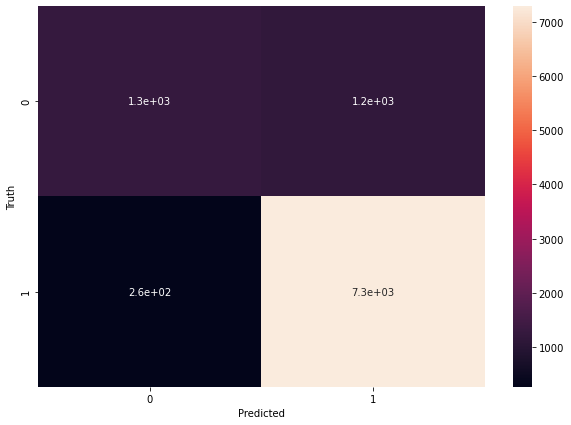

In [49]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [50]:
print(classification_report(y_test,y_pred_uni))

              precision    recall  f1-score   support

         neg       0.83      0.51      0.63      2446
         pos       0.86      0.97      0.91      7554

    accuracy                           0.85     10000
   macro avg       0.84      0.74      0.77     10000
weighted avg       0.85      0.85      0.84     10000



In [71]:
def predict_uni_trans(Review):
    words=Review.split()
    clean_words=clean_review(words)
    x_paragraph=[" ".join(clean_words)]
    #print(x_paragraph)
    x=count_vec.transform(x_paragraph)
    #print(x)
    return x

In [73]:
# Review = input("Review: ")
# #print(predict(Review))
# print(svc.predict(predict_uni_trans(Review)))
# #I am really happy with the awesome product quality it works really well

Review: I am really happy with the awesome product quality it works really well
['pos']


In [51]:
svc_bigram= SVC()
svc_bigram.fit(x_train_features_bigram,y_train)

SVC()

In [52]:
svc_bigram.score(x_test_features_bigram,y_test)

0.8593

In [53]:
y_pred_bi=svc_bigram.predict(x_test_features_bigram)
cm_bi=confusion_matrix(y_test,y_pred_bi)
cm_bi

array([[1296, 1150],
       [ 257, 7297]], dtype=int64)

Text(33.0, 0.5, 'Truth')

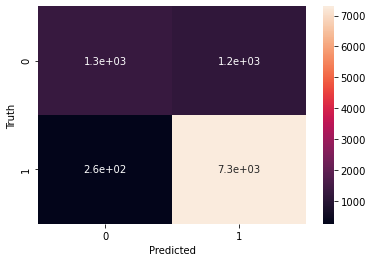

In [54]:
sn.heatmap(cm_bi,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [55]:
print(classification_report(y_test,y_pred_bi))

              precision    recall  f1-score   support

         neg       0.83      0.53      0.65      2446
         pos       0.86      0.97      0.91      7554

    accuracy                           0.86     10000
   macro avg       0.85      0.75      0.78     10000
weighted avg       0.86      0.86      0.85     10000



In [82]:
def predict_bi_trans(Review):
    words=Review.split()
    clean_words=clean_review(words)
    x_paragraph=[" ".join(clean_words)]
    #print(x_paragraph)
    x=count_vec_bigram.transform(x_paragraph)
    #print(x)
    return x

In [83]:
# Review = input("Review: ")
# #print(predict(Review))
# print(svc_bigram.predict(predict_bi_trans(Review)))
# #I am really happy with the awesome product quality it works really well

Review: I am really happy with the awesome product quality it works really well
['pos']


In [95]:
import pickle
with open('SVC_countvectorize_85.93_(bigram)_model','wb') as f:
    pickle.dump(svc_bigram,f)

In [96]:
import pickle
with open('SVC_countvectorize_85.49_(unigram)_model','wb') as f:
    pickle.dump(svc,f)